In [3]:
import pandas as pd

#### Load the data frame

In [4]:
df = pd.read_csv(r'C:\Users\PAPPU\Desktop\sentiment analysis\amazon.csv')

In [5]:
df.head(2)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0


In [6]:
##Remove reviewer name coloum
df= df.drop('reviewerName',axis=1)

In [8]:
df.head(2)

,Unnamed: 0,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0


In [9]:
from textblob import TextBlob

#### Calculate Sentiment polarty

In [10]:
df['polarity'] = df['reviewText'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [11]:
#Classify the sentence as positive , negative or nutral

In [12]:
df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x ==0 else 'negative'))


In [13]:
df[['reviewText','sentiment']].head(5)

,reviewText,sentiment
0,No issues.,neutral
1,"Purchased this for my device, it worked as adv...",positive
2,it works as expected. I should have sprung for...,positive
3,This think has worked out great.Had a diff. br...,neutral
4,"Bought it with Retail Packaging, arrived legit...",positive


#### Negative Comment 

In [14]:
df[df['sentiment']== 'negative'].head(2)

,Unnamed: 0,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,sentiment
5,5,5,It's mini storage. It doesn't do anything els...,29-04-2013,588,0,0,0,0,0.0,0.0,-0.025,negative
11,11,3,"It works, but file writes are a bit slower tha...",20-11-2013,383,0,0,0,0,0.0,0.0,-0.050,negative


#### Show it on bar chart

In [15]:
sentiment = df['sentiment'].value_counts()

#### Define the color for sentiments

In [16]:
sentiment_colors = ['red',(1.0,0.75,0.0),'blue'] #color mopping

#### plot the pie chart

<AxesSubplot:title={'center':' Sentiment Analysis of Amazone review'}, ylabel='sentiment'>

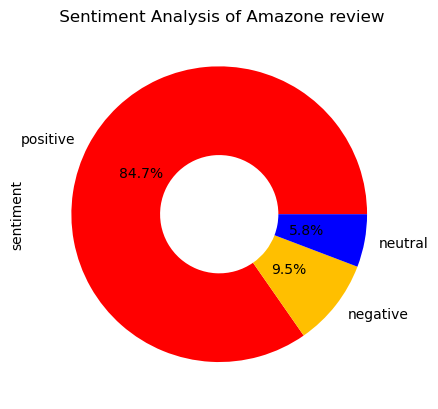

In [17]:
sentiment.plot(kind='pie',title = ' Sentiment Analysis of Amazone review',colors= sentiment_colors,
               autopct='%1.1f%%',##Show the percentage
               wedgeprops=dict(width=0.6))##Adjust make it Donut chrt

### Generate Word cloud

In [18]:
from wordcloud import WordCloud

In [19]:
import matplotlib.pyplot as plt

In [20]:
#combine all comment in a sngle string
text = "".join(comment for comment in df['reviewText'].dropna())

In [21]:
####Genarete word cloud
wordcloud = WordCloud(background_color='white',width=800,height=400).generate(text)

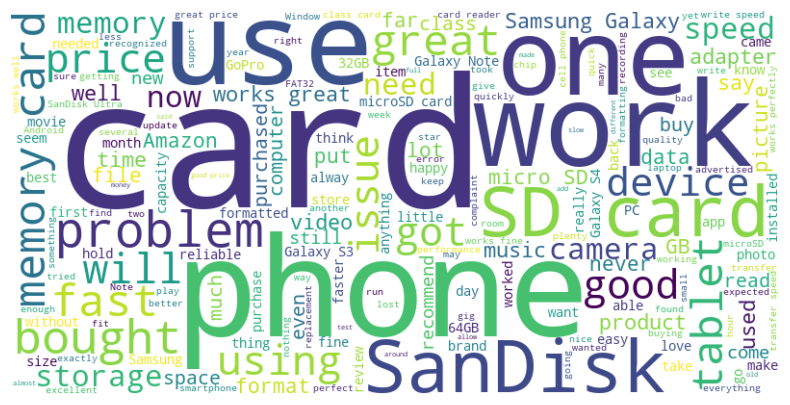

In [22]:
#Display the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()